In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,  f1_score, confusion_matrix


from Neural_Network_final import Neural



## Functions

## Import

In [2]:
# Adicionando a coluna nomes
cols = ['BI-RADS','idade','forma','margem','densidade','target']
df = pd.read_excel('db/dadosmamografia.xlsx',names=cols)

In [3]:
# overview do dataframe
df

,BI-RADS,idade,forma,margem,densidade,target
0,5,58,4,5,3,1
1,4,28,1,1,3,0
2,5,57,1,5,3,1
3,5,76,1,4,3,1
4,3,42,2,1,3,1
...,...,...,...,...,...,...
828,4,47,2,1,3,0
829,4,56,4,5,3,1
830,4,64,4,5,3,0
831,5,66,4,5,3,1


##  Train and  Test

In [4]:
# Separando os dados de Entrada(X) e Saída(y)
X = df.drop('target', axis=1)
y = df['target']


In [5]:
# Separando os dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Reshape nos dados  y_train: (666, ) para -> y_train: (666, 1)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [7]:
print(f'X_train:{X_train.shape}\ny_train: {y_train.shape}')

X_train:(666, 5)
y_train: (666, 1)


In [8]:
print(f'X_test:{X_test.shape}\ny_test: {y_test.shape}')

X_test:(167, 5)
y_test: (167, 1)


In [9]:
# Configurando a topologia e os parametros da rede

first_layer = X_train.shape[1] #5
layer_structure = [first_layer,3,1] # topologia da rede

nn = Neural(layer_structure, epochs= 1000, learning_rate=1e-4, batch_size=64, validation_split= 0.2, verbose= 0,activation_function='tanh',random_state=42)

Layer 1 - Weights:
[[-0.02509198  0.09014286  0.04639879]
 [ 0.0197317  -0.06879627 -0.0688011 ]
 [-0.08838328  0.07323523  0.020223  ]
 [ 0.04161452 -0.0958831   0.09398197]
 [ 0.06648853 -0.05753218 -0.06363501]]
Biases:
[[0.18340451 0.30424224 0.52475643]]

Layer 2 - Weights:
[[-0.013611  ]
 [-0.04175417]
 [ 0.02237058]]
Biases:
[[0.13949386]]

Accuracy: 0.7964071856287425
Test error:  0.14449757773466584


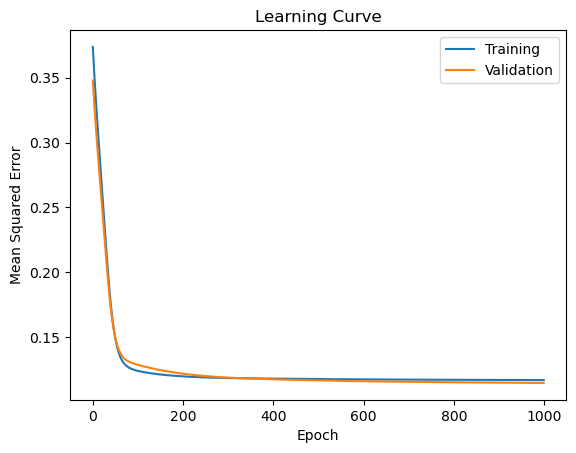

In [10]:
# Treinar a rede neural
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

# Arredondar as previsões para 0 ou 1
rounded_predictions = np.round(y_pred)

# Calcular a acurácia

accuracy = accuracy_score(y_test, rounded_predictions)
# f1 score
#f1 = f1_score(y_test, rounded_predictions)
# Imprimir a acurácia
print("Accuracy:", accuracy)
#Imiprimir mse
print("Test error: ",mean_squared_error(y_test, y_pred))
#Imiprimir f1_score
#print("f1_score:", f1)

nn.plot_learning_curve()


/tmp/ipykernel_5877/3405169657.py:2: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


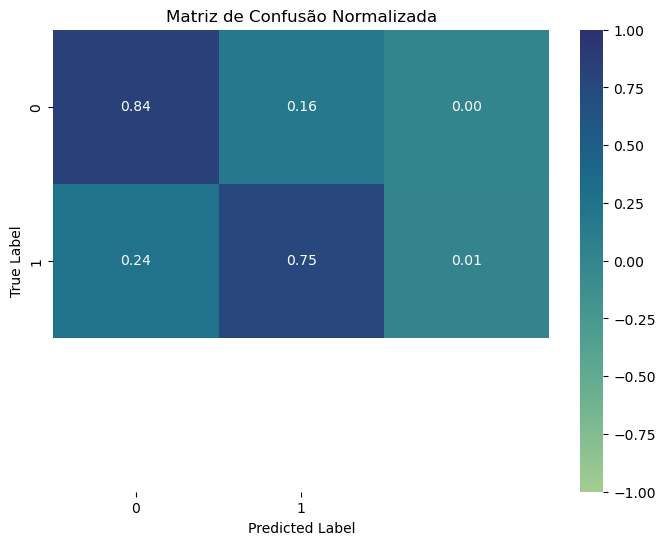

In [11]:
cm = confusion_matrix(y_test, rounded_predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True,cmap='crest', fmt=".2f", xticklabels=['0', '1'], yticklabels=['0', '1'],vmax=1,vmin=-1)
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
nn.print_parameters()

Layer 1 - Weights:
[[-0.00389908  0.20839634  0.42536828]
 [ 0.11472692  0.07113812  0.13816492]
 [-0.02651709  0.16110825  0.13246174]
 [ 0.09653837  0.00433945  0.17067038]
 [ 0.06409453 -0.03203431 -0.04540647]]
Biases:
[[0.18279847 0.30305994 0.52506967]]

Layer 2 - Weights:
[[0.07598254]
 [0.12100376]
 [0.54772124]]
Biases:
[[0.12715108]]

